In [5]:
import pandas as pd
import shapely
from shapely.geometry import Polygon
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely import wkt
import contextily as ctx
import matplotlib.colors as mcolors
import numpy as np
import holoviews as hv
from holoviews import dim, opts


#xi number of cahrging stations ti install on piint i

excel_data_df = pd.read_excel('Demand_data.xlsx')
excel_data_df=excel_data_df.dropna()

final_results = pd.read_csv(r'C:\Users\Oleguer Simon\OneDrive - University of Edinburgh\S1.3. Methodology, Modelling and Consulting Skills\Group project\MMCS_project\Chargerss.csv')
final_results

,Ref,Slow_year1,Fast_year1,Rapid_year1,Slow_year2,Fast_year2,Rapid_year2,Slow_year3,Fast_year3,Rapid_year3,Slow_year4,Fast_year4,Rapid_year4
0,61,1,1,0,1,1,0,1,1,0,1,1,0
1,75,1,0,0,1,0,0,1,0,1,1,0,1
2,76,0,1,0,0,1,0,0,1,1,0,1,1
3,77,1,0,0,1,0,0,1,0,0,1,0,0
4,88,0,0,1,1,0,1,1,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,385,0,0,0,0,0,0,0,0,0,0,0,0
104,397,0,0,0,1,0,0,1,0,0,1,0,0
105,399,0,0,0,0,0,0,0,0,0,0,0,0
106,400,0,0,0,0,0,0,0,0,0,0,0,0


________________________________________________

In [2]:
excel_data_df['geometry'] = gpd.GeoSeries.from_wkt(excel_data_df['geometry'])
gdf = gpd.GeoDataFrame(excel_data_df, geometry='geometry', crs = 'EPSG:4326')
print(gdf.head())

   Ref                                           geometry  \
0  1.0  POLYGON ((-3.10582 56.44297, -3.10596 56.44787...   
1  2.0  POLYGON ((-3.10596 56.44787, -3.10610 56.45276...   
2  3.0  POLYGON ((-3.10610 56.45276, -3.10625 56.45766...   
3  4.0  POLYGON ((-3.10625 56.45766, -3.10639 56.46256...   
4  5.0  POLYGON ((-3.10639 56.46256, -3.10653 56.46746...   

   Number of Charging Points  Number of Slow Charging Points  \
0                        0.0                             0.0   
1                        0.0                             0.0   
2                        0.0                             0.0   
3                        0.0                             0.0   
4                        0.0                             0.0   

   Number of Fast Charging Points  Number of Rapid Charging Points  \
0                             0.0                              0.0   
1                             0.0                              0.0   
2                             0.0     

In [45]:
#To create custom colours, but not even necessary
# from matplotlib.colors import LinearSegmentedColormap
# colors = [(0,0,1,c) for c in np.linspace(0,1,100)]
# cmapblue = mcolors.LinearSegmentedColormap.from_list('mycmap', colors, N=5)
# colors = [(1,1,1,0), (0,0,0,1)]
# cm = LinearSegmentedColormap.from_list('custom', colors, N=256, gamma=0)

(331076.5363240854, 349670.2089197634, 728032.3556632419, 736429.4981276263)

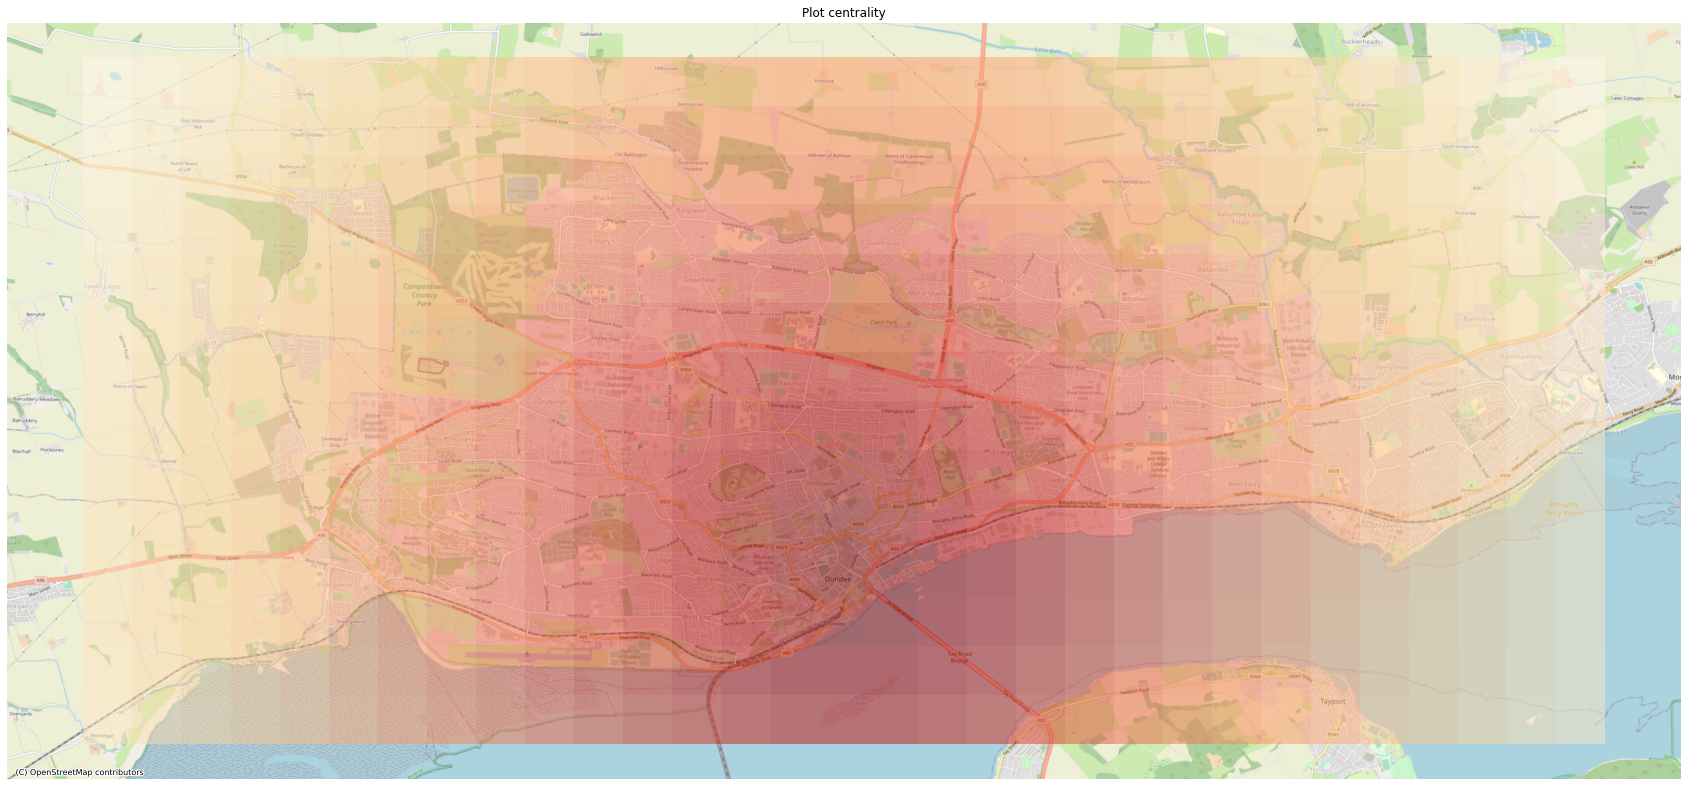

In [95]:
gdf = gdf.to_crs('EPSG:27700')
axes = gdf.plot(figsize=(30,20), column='Distance from Centre', cmap='OrRd_r', legend=False, alpha=0.5)
#fig, axs = plt.c(2, 2)

axes.axis('off')

axes.set_title('Plot centrality')

ctx.add_basemap(axes, source=ctx.providers.OpenStreetMap.Mapnik,crs='EPSG:27700')
axes.axis('off')


In [ ]:
fig, axs = plt.subplots(2, 2)
axes = gdf.plot(figsize=(30,20), column='Demand_3', cmap=cm, legend=False, alpha=0.5)

#fig, axs = plt.c(2, 2)

ctx.add_basemap(axes, source=ctx.providers.OpenStreetMap.Mapnik,crs='EPSG:4326')
axes.axis('off')

In [78]:
labels= excel_data_df['Demand_0'].values
labels

labels_reshaped=np.reshape(labels, (31, 14)) 
labels_reshaped

array([[    0.      ,     0.      ,     0.      ,     0.      ,
            0.      ,     0.      ,     0.      ,     0.      ,
            0.      ,     0.      ,     0.      ,     0.      ,
            0.      ,     0.      ],
       [    0.      ,     0.      ,     0.      ,     0.      ,
            0.      ,     0.      ,     0.      ,     0.      ,
            0.      ,     0.      ,     0.      ,     0.      ,
            0.      ,     0.      ],
       [    0.      ,     0.      ,     0.      ,     0.      ,
            0.      ,     0.      ,     0.      ,     0.      ,
            0.      ,     0.      ,     0.      ,     0.      ,
            0.      ,     0.      ],
       [    0.      ,     0.      ,     0.      ,     0.      ,
            0.      ,     0.      ,     0.      ,     0.      ,
            0.      ,     0.      ,     0.      ,     0.      ,
            0.      ,     0.      ],
       [    0.      ,     0.      ,     0.      ,     0.      ,
            0.      

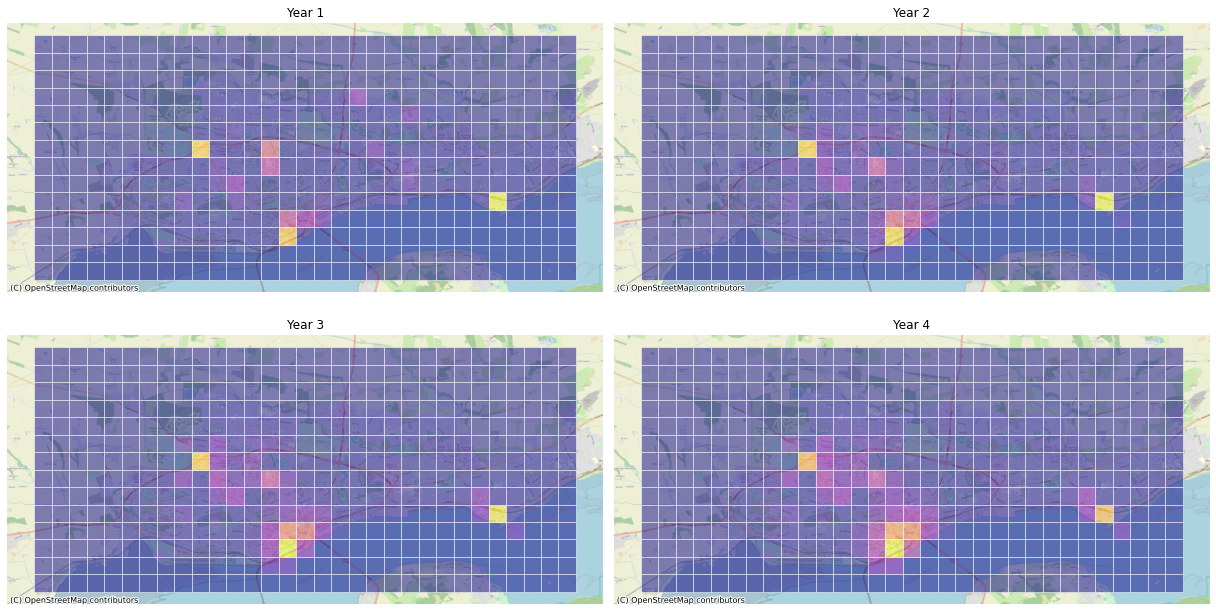

In [91]:
fig, axs = plt.subplots(2, 2, figsize=(17,9))



#year 0
gdf.plot(ax=axs[0, 0], column='Demand_0', cmap='plasma', legend=False, alpha=0.5, edgecolor='white')
ctx.add_basemap(ax=axs[0, 0], source=ctx.providers.OpenStreetMap.Mapnik,crs='EPSG:27700')

#year 1
gdf.plot(ax=axs[0, 1], column='Demand_1', cmap='plasma', legend=False, alpha=0.5, edgecolor='white')
ctx.add_basemap(ax=axs[0, 1], source=ctx.providers.OpenStreetMap.Mapnik,crs='EPSG:27700')

#year 2
gdf.plot(ax=axs[1, 0], column='Demand_2', cmap='plasma', legend=False, alpha=0.5, edgecolor='white')
ctx.add_basemap(ax=axs[1, 0], source=ctx.providers.OpenStreetMap.Mapnik,crs='EPSG:27700')

#year 3
gdf.plot(ax=axs[1, 1], column='Demand_3', cmap='plasma', legend=False, alpha=0.5, edgecolor='white')
ctx.add_basemap(ax=axs[1, 1], source=ctx.providers.OpenStreetMap.Mapnik,crs='EPSG:27700')



# Hide x labels and tick labels for top plots and y ticks for right plots.
# for ax in axs.flat:
#     ax.label_outer()
axs[0, 0].axis('off')
axs[0, 1].axis('off')
axs[1, 0].axis('off')
axs[1, 1].axis('off')

axs[0, 0].set_title('Year 1')
axs[0, 1].set_title('Year 2')
axs[1, 0].set_title('Year 3')
axs[1, 1].set_title('Year 4')
 

#axs[1, 1].imshow(labels_reshaped)
fig.tight_layout()

